# 引言
## 1 项目说明
数据来源：kaggle比赛数据集 give me some credit  
项目目的：根据客户信息，建立违约模型，制作评分卡，利用AUC和KS值作为评价指标，最终选出评价效果最好的预测模型。  
变量说明：  
SeriousDlqin2yrs：超过90天或更糟的逾期拖欠  
RevolvingUtilizationOfUnsecuredLines：除了房贷车贷之外的信用卡账面金额（即贷款金额）/信用卡总额度  
age：贷款人年龄  
NumberOfTime30-59DaysPastDueNotWorse：35-59天逾期但不糟糕次数  
DebtRatio：负债比率  
MonthlyIncome：月收入  
NumberOfOpenCreditLinesAndLoans：开放式信贷和贷款数量，开放式贷款（分期付款如汽车贷款或抵押贷款）和信贷（如信用卡）的数量  
NumberOfTimes90DaysLate：借款者有90天或更高逾期的次数  
NumberRealEstateLoansOrLines：不动产贷款或额度数量  
NumberOfTime60-89DaysPastDueNotWorse：60-89天逾期但不糟糕次数  
NumberOfDependents：不包括本人在内的家属数量  

## 2 项目过程
主要步骤：  
1导入数据：查看数据基本情况  
2数据清洗：处理重复值、缺失值、异常值   
3特征工程：分箱、筛选变量、制作评分卡  
4数据分析及建模：线性回归、处理数据不平衡、随机森林法、梯度提升法、结果输出  


# 代码实现
## 1 导入数据
加载必要的Python库，导入数据并查看数据的基本情况。

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import re as re
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
# 读取训练集和测试集数据
train_df = pd.read_csv("C:/Users/szd/Desktop/机器学习/cs-training.csv")
test_df = pd.read_csv("C:/Users/szd/Desktop/机器学习/cs-test.csv")

In [3]:
# 查看训练集的基本情况
print(train_df.info())
train_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


发现变量MonthlyIncome以及NumberOfDependents存在空缺值。

In [4]:
# 查看测试集的基本情况
print(test_df.info())
test_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            101503 non-null  int64  
 1   SeriousDlqin2yrs                      0 non-null       float64
 2   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 3   age                                   101503 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 5   DebtRatio                             101503 non-null  float64
 6   MonthlyIncome                         81400 non-null   float64
 7   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 8   NumberOfTimes90DaysLate               101503 non-null  int64  
 9   NumberRealEstateLoansOrLines          101503 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 11  

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


同样，变量MonthlyIncome以及NumberOfDependents存在空缺值。

## 2 数据清洗
### 2.1 数据检查

In [5]:
# 将第一列命名
train_df.rename(columns={'Unnamed: 0':'ID'}, inplace=True)
test_df.rename(columns={'Unnamed: 0':'ID'}, inplace=True)

In [6]:
# 检查是否存在重复的数据
print(train_df.duplicated().value_counts())
print(test_df.duplicated().value_counts())

False    150000
dtype: int64
False    101503
dtype: int64


结果显示没有重复数据，不采取操作。

In [7]:
# 查看训练集数据的描述性统计，判断是否存在异常值
train_df.describe()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


从结果可以看处，年龄出现了0，不合理，用中位数替换。   
NumberOfTime30-59DaysPastDueNotWorse, NumberOfTimes90DaysLate, NumberOfTime60-89DaysPastDueNotWorse三种的最大值都是98，导致平均值很接近，应该排查一下；同理，NumberOfOpenCreditLinesAndLoans，NumberRealEstateLoansOrLines也存在这种情况。可以通过检查一下这几个参数之间的相关性进行数据清洗。

In [8]:
# 查看测试集数据的描述性统计，判断是否存在异常值
test_df.describe()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,101503.000000,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,50752.000000,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,29301.536524,NaN,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,1.000000,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25376.500000,NaN,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,50752.000000,NaN,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,76127.500000,NaN,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,101503.000000,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


测试数据集与上述有关于训练集的问题一致。

C:\Users\szd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

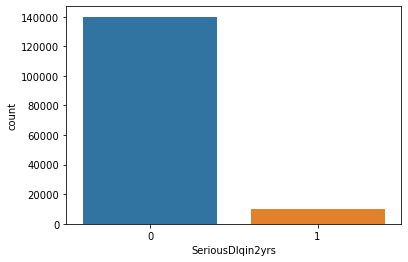

In [9]:
# 对分类结果SeriousDlqin2yrs查看
import seaborn as sns
plt.figure()
sns.countplot('SeriousDlqin2yrs',data=train_df)

可以看出分类结果极其不平衡。

In [10]:
# 统计两个事件发生的数量及发生率
P = train_df.groupby('SeriousDlqin2yrs')['ID'].count().reset_index()
P['Percentage'] = 100 * P['ID'] / P['ID'].sum()
print(P)

   SeriousDlqin2yrs      ID  Percentage
0                 0  139974      93.316
1                 1   10026       6.684


从结果可以看出，事件发生的比率为0:1=139974:10026，是存在严重的样本不平衡的。这是在金融风控中非常常见的，因为会存在严重违约的用户毕竟是少数。  
但处理样本不平衡对于信贷违约数据的学习任务非常关键，原因包括：  
1.避免偏倚结果：在信贷违约数据中，违约样本可能是我们更感兴趣的关注点。如果不处理样本不平衡，模型可能会倾向于预测更多的样本为正常还款，导致对于违约样本的识别能力较差。处理样本不平衡可以减少这种偏倚，提高对违约样本的预测准确性。  
2.改善模型性能：处理样本不平衡可以改善模型在信贷违约数据上的性能。不平衡数据集可能导致模型学习到的决策边界不准确，难以有效区分违约和正常还款样本。通过处理样本不平衡，可以使模型更好地学习到违约样本和正常还款样本之间的区分特征，从而提高模型的分类性能。  
3.减少风险和损失：在信贷领域，违约样本通常对风险评估和决策具有重要意义。如果模型无法准确识别违约样本，可能导致信贷风险增加和潜在损失。通过处理样本不平衡，可以降低风险，减少违约带来的损失。  

## 2.2 数据整理

从前述分析中得知，“年龄”中的最小值是0。根据常识，小于18岁是不能在银行办理信用卡或是贷款业务的。我们来看下小于18岁的有几行。

In [11]:
train_df.loc[train_df['age'] < 18]

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
65695,65696,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


发现只有一个年龄小于18，使用中位数替代。

In [12]:
train_df.loc[train_df['age'] == 0, 'age'] = train_df['age'].median()

下面对MonthlyIncome的空缺值进行填充，按照变量age以退休年龄为标准对数据集进行划分，查看退休前后的人群月收入情况是否存在较大差别。

In [13]:
# 按照退休年龄划分数据集
working = train_df.loc[(train_df['age'] >= 18) & (train_df['age'] <= 60)]
senior = train_df.loc[(train_df['age'] > 60)]
working_income_mean = working['MonthlyIncome'].mean()
senior_income_mean = senior['MonthlyIncome'].mean()
print(working_income_mean)
print(senior_income_mean)

6664.136611272914
6686.5059913187015


可以看到退休与否的月收入差距不大，所以我们采用平均值对MonthlyIncome的空缺值进行填充。

In [14]:
train_df['MonthlyIncome'] = train_df['MonthlyIncome'].replace(np.nan,train_df['MonthlyIncome'].mean())

In [15]:
# 检查MonthlyIncome变量是否填充完成
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         150000 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [16]:
# 对NumberOfDependents非空值统计
train_df['NumberOfDependents'].value_counts()

0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
20.0        1
13.0        1
Name: NumberOfDependents, dtype: int64

可以看到数据基本集中在0~4个，因此我们采用中位数进行填充。

In [17]:
# 对空值用中位数填充
train_df['NumberOfDependents'].fillna(train_df['NumberOfDependents'].median(), inplace=True)

<AxesSubplot:>

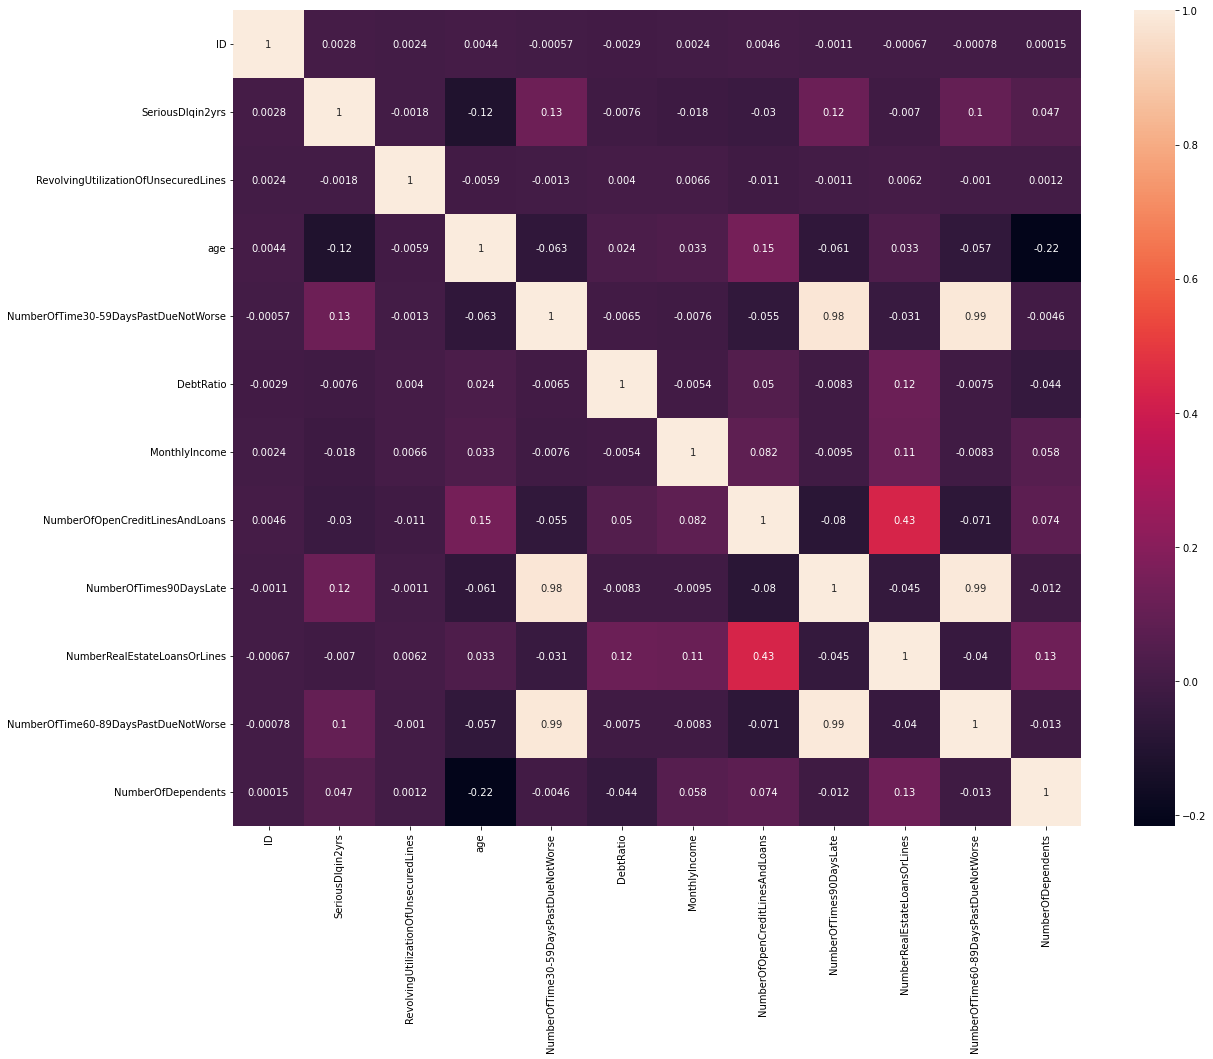

In [18]:
# 检查数据的相关性
corr = train_df.corr()
plt.figure(figsize=(19, 15))
sns.heatmap(corr, annot=True, fmt='.2g')

由上图可见，NumberOfTime30-59DaysPastDueNotWorse, NumberOfTimes90DaysLate以及NumberOfTime60-89DaysPastDueNotWorse三者之间的相关性很大。

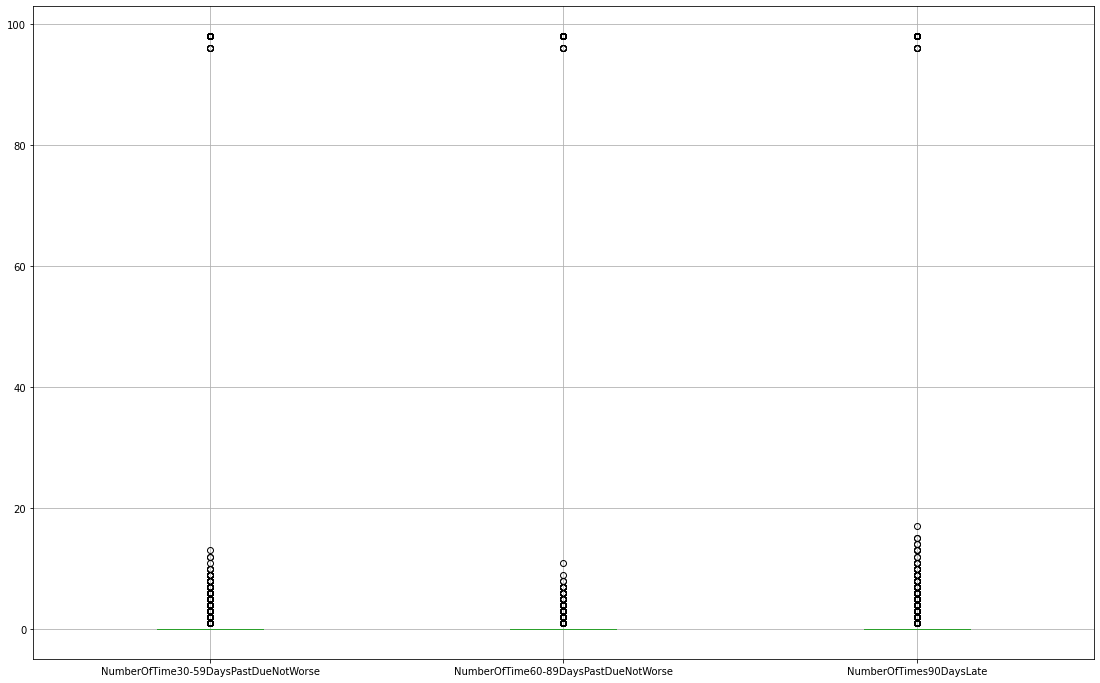

In [19]:
# 查看一下三者的箱型图
plt.figure(figsize=(19, 12)) 
train_df[['NumberOfTime30-59DaysPastDueNotWorse', 
          'NumberOfTime60-89DaysPastDueNotWorse',
          'NumberOfTimes90DaysLate']].boxplot()
plt.show()

发现三个变量都存在两个明显的离群点，将其视为异常值并删除，再检验变量之间的相关性。

In [20]:
# 去掉98和96两个点
def replace98and96(column):
    new = []
    newval = column.median()
    for i in column:
        if (i == 96 or i == 98):
            new.append(newval)
        else:
            new.append(i)
    return new

train_df['NumberOfTime30-59DaysPastDueNotWorse'] = replace98and96(train_df['NumberOfTime30-59DaysPastDueNotWorse'])
train_df['NumberOfTimes90DaysLate'] = replace98and96(train_df['NumberOfTimes90DaysLate'])
train_df['NumberOfTime60-89DaysPastDueNotWorse'] = replace98and96(train_df['NumberOfTime60-89DaysPastDueNotWorse'])

test_df['NumberOfTime30-59DaysPastDueNotWorse'] = replace98and96(test_df['NumberOfTime30-59DaysPastDueNotWorse'])
test_df['NumberOfTimes90DaysLate'] = replace98and96(test_df['NumberOfTimes90DaysLate'])
test_df['NumberOfTime60-89DaysPastDueNotWorse'] = replace98and96(test_df['NumberOfTime60-89DaysPastDueNotWorse'])

<AxesSubplot:>

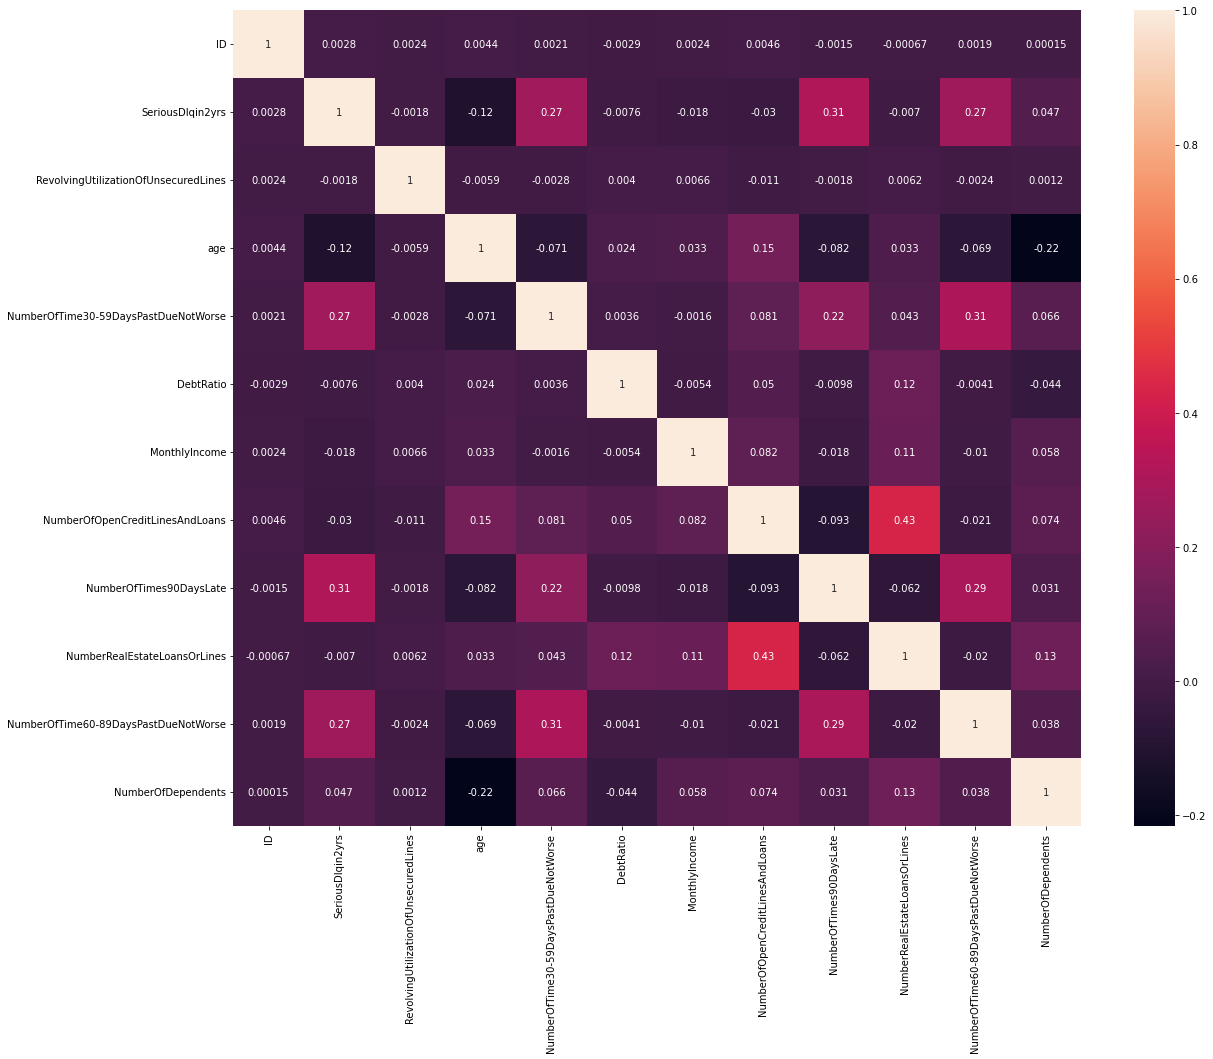

In [21]:
# 再次检查数据的相关性
corr = train_df.corr()
plt.figure(figsize=(19, 15))
sns.heatmap(corr, annot=True, fmt='.2g')

可以看到相关性减弱，变量NumberOfTime30-59DaysPastDueNotWorse, NumberOfTimes90DaysLate以及NumberOfTime60-89DaysPastDueNotWorse清洗完成。

In [22]:
# 对测试集进行同样的数据清洗
test_df.loc[test_df['age'] == 0, 'age'] = test_df['age'].median()
test_df['MonthlyIncome'] = test_df['MonthlyIncome'].replace(np.nan,test_df['MonthlyIncome'].mean())
test_df['NumberOfDependents'].fillna(test_df['NumberOfDependents'].median(), inplace=True)

## 3 特征工程

特征工程部分就是分析出哪些变量对违约率影响大，选出来作为模型的变量。而评估特征的方法有很多，常用的就是iv值法评估。为计算变量的iv值，需要对变量分箱、woe值计算最后是iv值计算。

### 3.1 数据分箱

变量分箱（binning）就是对变量离散化（discretization）的一种称呼。特征离散化后，模型会更稳定，降低了模型过拟合的风险。同时分箱之后可以降低数据量，使模型泛化能力增强。一般常用的分箱有：等距分箱、等深分箱、最优分箱等。等距是指区间是一致的，比如年龄以十年作为一个分箱；等深是先确定分箱数量，然后令每个分箱中数据数量大致相等；最优分箱（Optimal Binning）又叫有监督分箱（supervised discretizaion），如使用递归划分（Recursive Partitioning）将连续变量分箱。
在pd里cut是等距分箱，qcut是等深分箱，这里我们借鉴https://mp.weixin.qq.com/s/6CkWwxkfyt3EPHaI5solsQ的方法对数据进行分箱。

In [23]:
cut1=pd.qcut(train_df["RevolvingUtilizationOfUnsecuredLines"],5,labels=False)
cut2=pd.qcut(train_df["age"],8,labels=False)
bins3=[-1,0,1,3,5,13]
cut3=pd.cut(train_df["NumberOfTime30-59DaysPastDueNotWorse"],bins3,labels=False)
cut4=pd.qcut(train_df["DebtRatio"],5,labels=False)
cut5=pd.qcut(train_df["MonthlyIncome"],5,labels=False)
cut6=pd.qcut(train_df["NumberOfOpenCreditLinesAndLoans"],5,labels=False)
bins7=[-1, 0, 1, 3,5, 20]
cut7=pd.cut(train_df["NumberOfTimes90DaysLate"],bins7,labels=False)
bins8=[-1, 0,1,2, 3, 33]
cut8=pd.cut(train_df["NumberRealEstateLoansOrLines"],bins8,labels=False)
bins9=[-1, 0, 1, 3, 12]
cut9=pd.cut(train_df["NumberOfTime60-89DaysPastDueNotWorse"],bins9,labels=False)
bins10=[-1, 0, 1, 2, 3, 5, 21]
cut10=pd.cut(train_df["NumberOfDependents"],bins10,labels=False)

In [24]:
#加入retbins变量便于后续查看如分箱情况
ccut1=pd.qcut(train_df["RevolvingUtilizationOfUnsecuredLines"],5,labels=False, retbins=True)
ccut2=pd.qcut(train_df["age"],8,labels=False, retbins=True)
bins3=[-1,0,1,3,5,13]
ccut3=pd.cut(train_df["NumberOfTime30-59DaysPastDueNotWorse"],bins3,labels=False, retbins=True)
ccut4=pd.qcut(train_df["DebtRatio"],5,labels=False, retbins=True)
ccut5=pd.qcut(train_df["MonthlyIncome"],5,labels=False, retbins=True)
ccut6=pd.qcut(train_df["NumberOfOpenCreditLinesAndLoans"],5,labels=False, retbins=True)
bins7=[-1, 0, 1, 3,5, 20]
ccut7=pd.cut(train_df["NumberOfTimes90DaysLate"],bins7,labels=False, retbins=True)
bins8=[-1, 0,1,2, 3, 33]
ccut8=pd.cut(train_df["NumberRealEstateLoansOrLines"],bins8,labels=False, retbins=True)
bins9=[-1, 0, 1, 3, 12]
ccut9=pd.cut(train_df["NumberOfTime60-89DaysPastDueNotWorse"],bins9,labels=False, retbins=True)
bins10=[-1, 0, 1, 2, 3, 5, 21]
ccut10=pd.cut(train_df["NumberOfDependents"],bins10,labels=False, retbins=True)

### 3.2 WOE值计算

WOE（Weight of Evidence）是一种常用的特征转换方法，用于处理分类变量或离散化后的连续变量。它在信用风险评分和预测建模等领域广泛应用。  
WOE基于对数比率的概念，用于度量自变量（特征）与因变量（目标变量）之间的关联程度。它通过计算每个类别的触发概率（违约概率）与非触发概率之间的比值的自然对数来表示特征的信息价值。  
WOE的计算公式如下：  
WOE = ln((触发组中的触发概率) / (非触发组中的触发概率))    
在信用风险评分中，触发组通常是指违约组（坏客户），非触发组是指非违约组（好客户）。通过计算每个类别的WOE值，可以得到特征不同类别之间的信息价值差异，进而衡量特征对目标变量的预测能力。    
WOE的特点包括： 
1.WOE值的范围为负无穷到正无穷，正值表示与目标变量正相关，负值表示与目标变量负相关，0表示没有关联。  
2.WOE转换后的特征具有良好的可解释性，可以直观地理解特征对目标变量的影响。   
3.WOE转换可以解决特征中存在类别不平衡问题的情况。  
在实际应用中，可以将WOE值作为特征输入到机器学习模型中，代替原始的分类变量，以提高模型的性能和稳定性。此外，还可以根据WOE值的大小，进行特征选择和排序，选择对目标变量预测能力较强的特征进行建模和分析。  

In [25]:
#计算woe值
def get_woe_data(data,cut):
    rate=data["SeriousDlqin2yrs"].sum()/(data["SeriousDlqin2yrs"].count()-data["SeriousDlqin2yrs"].sum())
    grouped=data["SeriousDlqin2yrs"].groupby(cut,as_index = True).value_counts()
    woe=np.log(grouped.unstack().iloc[:,1]/grouped.unstack().iloc[:,0]/rate)
    return woe

cut1_woe = get_woe_data(train_df,cut1)
cut2_woe = get_woe_data(train_df,cut2)
cut3_woe = get_woe_data(train_df,cut3)
cut4_woe = get_woe_data(train_df,cut4)
cut5_woe = get_woe_data(train_df,cut5)
cut6_woe = get_woe_data(train_df,cut6)
cut7_woe = get_woe_data(train_df,cut7)
cut8_woe = get_woe_data(train_df,cut8)
cut9_woe = get_woe_data(train_df,cut9)
cut10_woe = get_woe_data(train_df,cut10)

### 3.3 IV值计算
IV全称是Information Value，翻译成信息价值。IV用来确定变量的预测能力。iv可以看作是woe的加权求和。

In [26]:
#计算iv值

def get_IV_data(data,cut,cut_woe):
    grouped=data["SeriousDlqin2yrs"].groupby(cut,as_index = True).value_counts()
    cut_IV=((grouped.unstack().iloc[:,1]/data["SeriousDlqin2yrs"].sum()-grouped.unstack().iloc[:,0]/(data["SeriousDlqin2yrs"].count()-data["SeriousDlqin2yrs"].sum()))*cut_woe).sum()   
    return cut_IV

In [27]:
#计算各分组的IV值
cut1_IV=get_IV_data(train_df,cut1,cut1_woe)
cut2_IV=get_IV_data(train_df,cut2,cut2_woe)
cut3_IV=get_IV_data(train_df,cut3,cut3_woe)
cut4_IV=get_IV_data(train_df,cut4,cut4_woe)
cut5_IV=get_IV_data(train_df,cut5,cut5_woe)
cut6_IV=get_IV_data(train_df,cut6,cut6_woe)
cut7_IV=get_IV_data(train_df,cut7,cut7_woe)
cut8_IV=get_IV_data(train_df,cut8,cut8_woe)
cut9_IV=get_IV_data(train_df,cut9,cut9_woe)
cut10_IV=get_IV_data(train_df,cut10,cut10_woe)

In [28]:
# 输出IV值计算结果
print('可用额度比值：',cut1_IV)
print('年龄：', cut2_IV)
print('逾期30-59天笔数：', cut3_IV)
print('负债率：',cut4_IV)
print('月收入：',cut5_IV)
print('信贷数量：',cut6_IV)
print('逾期90天笔数：',cut7_IV)
print('固定资产贷款量：',cut8_IV)
print('逾期60-89天笔数：',cut9_IV)
print('家属数量：',cut10_IV)

可用额度比值： 1.0596188771423887
年龄： 0.2570054531514715
逾期30-59天笔数： 0.7005774792009805
负债率： 0.0594876114580968
月收入： 0.06937125008029689
信贷数量： 0.04802315528985507
逾期90天笔数： 0.8273638624975935
固定资产贷款量： 0.06168339467151866
逾期60-89天笔数： 0.5526632235384523
家属数量： 0.03457951085544728


通过IV值判断变量的标准通常是：    
< 0.02: unpredictive  
0.02 to 0.1: weak  
0.1 to 0.3: medium  
0.3 to 0.5: strong  
\> 0.5: suspicious  
一般选取IV大于0.02的特征变量进行后续训练，从以上可以看出所有变量均满足。

## 4 传统评分卡制作
### 4.1 WOE值转换
在特征工程部分我们已经获取了每个变量值的分箱数据和woe值，现在我们用woe值替换各变量数据的分箱号，也就是原来的分箱数据是表示各个数值对应箱子号，现在替换成对应woe值。由于后续逻辑回归中有些变量无法通过显著性检验，因此这里剔除了不显著的变量后，仅对部分变量进行了转换。

In [29]:
def replace_data(cut,cut_woe):
    a=[]
    for i in cut.unique():
        a.append(i)
        a.sort()
    for m in range(len(a)):
        cut.replace(a[m],cut_woe.values[m],inplace=True)
    return cut
df_new=pd.DataFrame()   #新建df_new存放woe转换后的数据
df_new["SeriousDlqin2yrs"]=train_df["SeriousDlqin2yrs"]
df_new["RevolvingUtilizationOfUnsecuredLines"]=replace_data(cut1,cut1_woe)
df_new["age"]=replace_data(cut2,cut2_woe)
df_new["NumberOfTime30-59DaysPastDueNotWorse"]=replace_data(cut3,cut3_woe)
df_new["DebtRatio"]=replace_data(cut4,cut4_woe)
df_new["MonthlyIncome"]=replace_data(cut5,cut5_woe)
df_new["NumberOfTimes90DaysLate"]=replace_data(cut7,cut7_woe)
df_new["NumberOfTime60-89DaysPastDueNotWorse"]=replace_data(cut9,cut9_woe)
df_new["NumberOfDependents"]=replace_data(cut10,cut10_woe)

In [30]:
# 查看替换后的df_new数据
df_new

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1.242254,0.245430,1.737004,0.425358,-0.390198,-0.368445,-0.269053,0.209307
1,0,1.242254,0.366797,-0.513985,-0.097667,0.347772,-0.368445,-0.269053,0.102578
2,0,0.053164,0.366797,0.903654,-0.097667,0.347772,1.957968,-0.269053,-0.150060
3,0,-0.866502,0.563308,-0.513985,-0.097667,0.347772,-0.368445,-0.269053,-0.150060
4,0,1.242254,0.147350,0.903654,-0.097667,-0.390198,-0.368445,-0.269053,-0.150060
...,...,...,...,...,...,...,...,...,...
149995,0,-1.447382,-1.132145,-0.513985,-0.166025,0.347772,-0.368445,-0.269053,-0.150060
149996,0,0.053164,0.245430,-0.513985,0.425358,-0.117731,-0.368445,-0.269053,0.209307
149997,0,-0.866502,-0.397217,-0.513985,-0.201802,-0.117731,-0.368445,-0.269053,-0.150060
149998,0,-1.286617,0.563308,-0.513985,-0.097667,-0.117731,-0.368445,-0.269053,-0.150060


### 4.2 逻辑回归

In [31]:
# 调用statsmodels包来实现逻辑回归。
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_predict
x=df_new.iloc[:,1:]
y=df_new['SeriousDlqin2yrs']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
X1=sm.add_constant(x_train)
logit=sm.Logit(y_train,X1)
result=logit.fit()
print(result.summary()) 

Optimization terminated successfully.
         Current function value: 0.183423
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               120000
Model:                          Logit   Df Residuals:                   119991
Method:                           MLE   Df Model:                            8
Date:                Fri, 22 Dec 2023   Pseudo R-squ.:                  0.2500
Time:                        10:54:34   Log-Likelihood:                -22011.
converged:                       True   LL-Null:                       -29347.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.6250      0.0

### 4.3 建立评分系统
我们已经基本完成了建模相关的工作，并用ROC曲线验证了模型的预测能力。接下来的步骤，就是将Logistic模型转换为标准评分卡的形式。
这个问题就变成score=offset+factor*coe*x，因为factor*coe是常数所以这是线性函数了。
这里offset是常数叫基础分值，factor是 PDO（比率翻倍的分值），coe就是前面逻辑回归得到的coef变量的特征权值系数。x就是各个变量的woe值。factor和offsetyou由经验算法获得：需要注意的是coe有个常数项coe[0]，此时x取1，这样就在offset加了个常数偏置。

In [32]:
coe = [-2.6250,
0.6419,
0.4688,
0.5461,
0.6215,
0.2446,
0.5575,
0.4072,
0.0948]

In [33]:
factor = 20 / np.log(2)
offset = 600 - 20 * np.log(20) / np.log(2)
def get_score(coe,woe,factor):
    scores=round(-coe*woe*factor,0)         
    return scores

In [34]:
# 计算基础评分
base_score = offset - factor*result.params['const']
base_score

589.303209344757

In [35]:
#查看评分情况
x1 = get_score(coe[1], cut1_woe, factor)
x2 = get_score(coe[2], cut2_woe, factor)
x3 = get_score(coe[3], cut3_woe, factor)
x4 = get_score(coe[4], cut4_woe, factor)
x5 = get_score(coe[5], cut5_woe, factor)
x7 = get_score(coe[6], cut7_woe, factor)
x9 = get_score(coe[7], cut9_woe, factor)
x10 = get_score(coe[8], cut10_woe, factor)

print("可用额度比值对应的分数:{}".format(x1))
print("年龄对应的分数:{}".format(x2))
print("逾期30-59天笔数对应的分数:{}".format(x3))
print("负债率对应的分数:{}".format(x4))
print("月收入对应的分数:{}".format(x5))
print("逾期90天笔数对应的分数:{}".format(x7))
print("逾期60-89天笔数对应的分数:{}".format(x9))
print("家属数量对应的分数:{}".format(x10))

可用额度比值对应的分数:RevolvingUtilizationOfUnsecuredLines
0    24.0
1    27.0
2    16.0
3    -1.0
4   -23.0
dtype: float64
年龄对应的分数:age
0    -8.0
1    -5.0
2    -3.0
3    -2.0
4     1.0
5     5.0
6    12.0
7    15.0
dtype: float64
逾期30-59天笔数对应的分数:NumberOfTime30-59DaysPastDueNotWorse
0     8.0
1   -14.0
2   -27.0
3   -37.0
4   -42.0
dtype: float64
负债率对应的分数:DebtRatio
0    2.0
1    3.0
2    2.0
3   -8.0
4    4.0
dtype: float64
月收入对应的分数:MonthlyIncome
0   -2.0
1   -1.0
2    1.0
3    2.0
4    3.0
dtype: float64
逾期90天笔数对应的分数:NumberOfTimes90DaysLate
0     6.0
1   -31.0
2   -44.0
3   -53.0
4   -53.0
dtype: float64
逾期60-89天笔数对应的分数:NumberOfTime60-89DaysPastDueNotWorse
0     3.0
1   -22.0
2   -32.0
3   -37.0
dtype: float64
家属数量对应的分数:NumberOfDependents
0    0.0
1   -0.0
2   -1.0
3   -1.0
4   -1.0
5   -2.0
dtype: float64


In [36]:
#查看分箱边界点
print(ccut1)
print(ccut2)
print(ccut3)
print(ccut4)
print(ccut5)
print(ccut7)
print(ccut9)
print(ccut10)

(0         4
1         4
2         3
3         2
4         4
         ..
149995    1
149996    3
149997    2
149998    0
149999    4
Name: RevolvingUtilizationOfUnsecuredLines, Length: 150000, dtype: int64, array([0.00000000e+00, 1.92221734e-02, 8.31814918e-02, 2.71492542e-01,
       6.98857060e-01, 5.07080000e+04]))
(0         2
1         1
2         1
3         0
4         3
         ..
149995    7
149996    2
149997    5
149998    0
149999    6
Name: age, Length: 150000, dtype: int64, array([ 21.,  34.,  41.,  47.,  52.,  57.,  63.,  70., 109.]))
(0         2
1         0
2         1
3         0
4         1
         ..
149995    0
149996    0
149997    0
149998    0
149999    0
Name: NumberOfTime30-59DaysPastDueNotWorse, Length: 150000, dtype: int64, array([-1,  0,  1,  3,  5, 13]))
(0         3
1         0
2         0
3         0
4         0
         ..
149995    1
149996    3
149997    4
149998    0
149999    1
Name: DebtRatio, Length: 150000, dtype: int64, array([0.00000000e+00, 1

## 4 数据分析
### 4.1 数据设定

In [37]:
# 为了避免和交叉验证混淆，将train和test设定为其他名称
X = train_df.drop(['SeriousDlqin2yrs', 'ID'],axis=1)
y = train_df['SeriousDlqin2yrs']
W = test_df.drop(['SeriousDlqin2yrs', 'ID'],axis=1)
z = test_df['SeriousDlqin2yrs']

### 4.2 线性回归分类

In [38]:
# 用线性回归模型
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=111)

# 调用线性回归函数，C为正则化系数，l1表示L1正则化
logit = LogisticRegression(random_state=111, solver='saga', penalty='l1', class_weight='balanced', C=1.0, max_iter=500)

# 标准化拟合
scaler = StandardScaler().fit(X_train)

# 标准化X_train 和X_test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 线性回归拟合
logit.fit(X_train_scaled, y_train)

# 输入训练集，返回每个样本对应到每种分类结果的概率
logit_scores_proba = logit.predict_proba(X_train_scaled)

# 返回分类1的概率
logit_scores = logit_scores_proba[:,1]

In [39]:
# 画图
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(12,10))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], "k--") # 画直线做参考
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive rate")

AUC Score :  0.8160882912599647


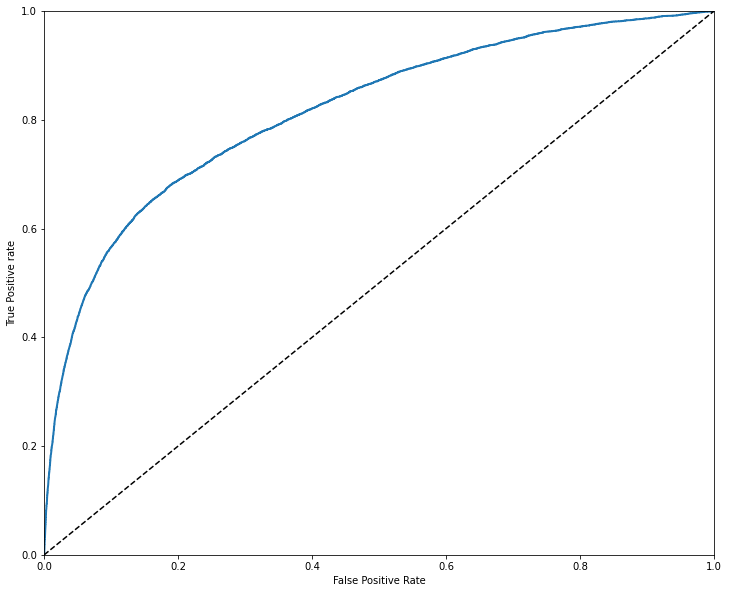

In [40]:
# roc_curve根据分类结果和分类概率，返回false positive rage和true positive rate
fpr_logit, tpr_logit, thresh_logit = roc_curve(y_train, logit_scores)

# 画图
plot_roc_curve(fpr_logit,tpr_logit)
print('AUC Score : ', (roc_auc_score(y_train,logit_scores)))

AUC Score : 0.8117632779507644


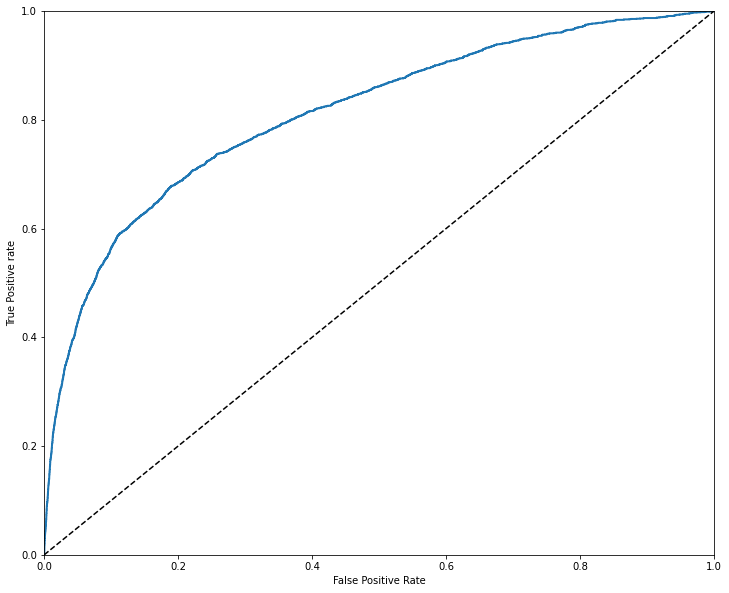

In [41]:
# 验证测试集，测试分类结果概率分布
logit_scores_proba_val = logit.predict_proba(X_test_scaled)

# 分类结果为1的概率
logit_scores_val = logit_scores_proba_val[:,1]

# roc_curve根据分类结果和分类概率，返回false positive rage和true positive rate
fpr_logit_val, tpr_logit_val, thresh_logit_val = roc_curve(y_test, logit_scores_val)

# 画图
plot_roc_curve(fpr_logit_val,tpr_logit_val)
print('AUC Score :', (roc_auc_score(y_test,logit_scores_val)))

In [42]:
# 采用LogisticRegressionCV来交叉验证选择正则化系数C
from sklearn.linear_model import LogisticRegressionCV
logit = LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1, 10, 100], penalty='l1', solver='saga', max_iter=500, class_weight='balanced', random_state=111)

# 线性回归拟合
logit.fit(X_train_scaled, y_train)

print(logit.C_)

[0.001]


AUC Score :  0.8146945737026572


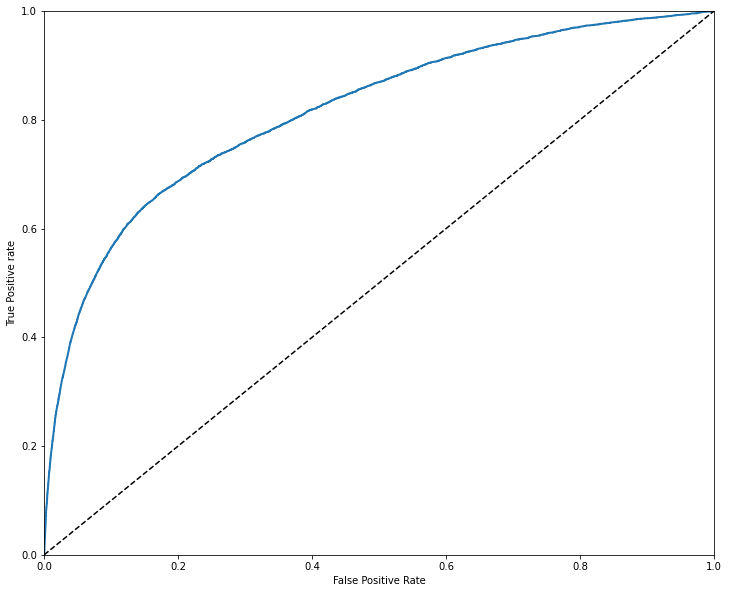

In [43]:
# 输入训练集，返回每个样本对应到每种分类结果的概率
logit_scores_proba = logit.predict_proba(X_train_scaled)

# 返回分类1的概率
logit_scores = logit_scores_proba[:,1]

# roc_curve根据分类结果和分类概率，返回false positive rage和true positive rate
fpr_logit, tpr_logit, thresh_logit = roc_curve(y_train, logit_scores)

# 画图
plot_roc_curve(fpr_logit,tpr_logit)
print('AUC Score : ', (roc_auc_score(y_train,logit_scores)))


从结果看，LR方法调参数并不能很好地提高AUC，虽然采用了balanced权重，但是效果还是不理想；接下来尝试采取SMOTE上采样的方法处理数据不平衡，再采用随机森林法和梯度提升法进行建模。     
随机森林法（Random Forest）和梯度提升法（Gradient Boosting）都是常用的集成学习方法，用于解决分类和回归问题。  
随机森林法是一种基于决策树的集成学习算法。它的基本思想是通过构建多个决策树，并对它们的结果进行集成来进行预测。随机森林中的每棵决策树都是独立地通过对数据集进行有放回抽样（bootstrap）得到的，同时在每个节点上，随机森林会随机选择一部分特征进行分裂。最后，通过对多棵决策树的预测结果进行投票或取平均值，来得到最终的预测结果。随机森林具有良好的鲁棒性，能够有效地处理高维数据和特征间的相关性，并且对于异常值和噪声具有一定的鲁棒性。    
梯度提升法是一种迭代的集成学习算法，通过反复迭代来逐步改进模型的预测能力。它通过逐步拟合一系列的弱学习器（通常是决策树），每个弱学习器都尝试纠正前面弱学习器的预测误差。在每次迭代中，梯度提升法会计算出当前模型对训练样本的预测残差（即真实值与当前模型预测值之间的差），然后在下一次迭代中拟合一个新的弱学习器来预测这些残差。最终，将所有弱学习器的预测结果进行加权求和，得到最终的预测结果。梯度提升法通过不断减小残差来逐步提升模型的预测能力，并且能够自适应地处理不同类型的损失函数。    
随机森林法和梯度提升法在处理分类和回归问题时都表现出良好的性能，并且在实践中被广泛应用。它们可以有效地处理高维数据、非线性关系和缺失值，并且对于特征选择和异常值的处理也比较鲁棒。选择使用哪种方法取决于具体的问题和数据特点，我们采用交叉验证的方法进行模型选择和调参。  

### 4.3 处理样本数据不平衡

In [44]:
import imblearn
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=404)
X_resampled, y_resampled = smote.fit_resample(X, y)

pd.Series(y_resampled).value_counts()

1    139974
0    139974
Name: SeriousDlqin2yrs, dtype: int64

In [45]:
# 划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_resampled, y_resampled, random_state=111)
X_train_rus.shape, y_train_rus.shape

((209961, 10), (209961,))

C:\Users\szd\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


AUC score:  0.5755083053785481


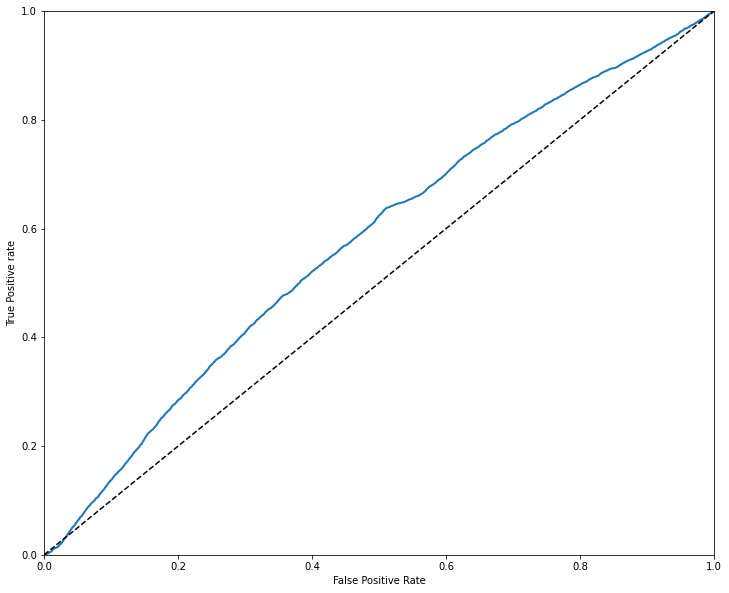

In [46]:
# 对重采样以后的数据进行分类
logit_resampled = LogisticRegression(random_state=111, solver='saga', penalty='l1', class_weight='balanced', C=1.0, max_iter=500)

logit_resampled.fit(X_resampled, y_resampled)
logit_resampled_proba_res = logit_resampled.predict_proba(X_resampled)
logit_resampled_scores = logit_resampled_proba_res[:, 1]
fpr_logit_resampled, tpr_logit_resampled, thresh_logit_resampled = roc_curve(y_resampled, logit_resampled_scores)
plot_roc_curve(fpr_logit_resampled, tpr_logit_resampled)
print ('AUC score: ', roc_auc_score(y_resampled, logit_resampled_scores))

准确率反而降低了。
### 4.4 随机森林法分类

AUC score: 0.9512959675920724


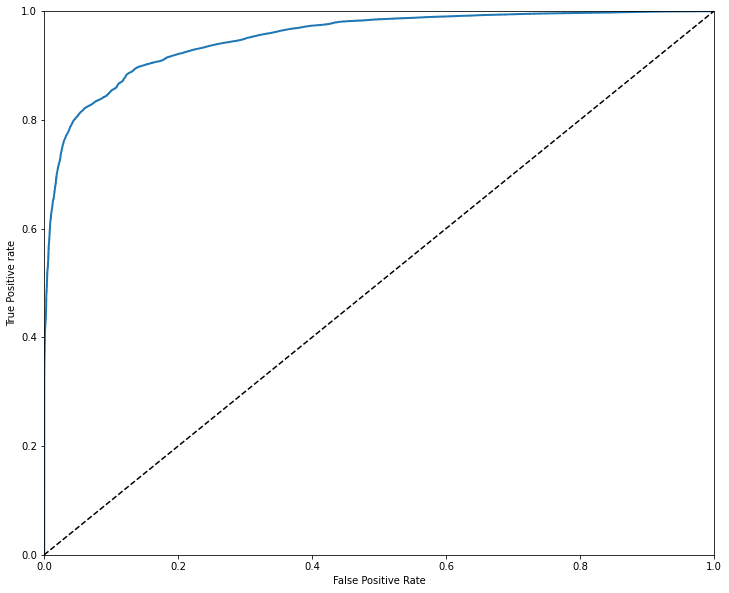

In [47]:
# 采用随机森林法分类
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
forest= RandomForestClassifier(n_estimators=300, random_state=111, max_depth=5, class_weight='balanced')
forest.fit(X_train_rus, y_train_rus)
y_scores_prob = forest.predict_proba(X_train_rus)
y_scores = y_scores_prob[:, 1]
fpr, tpr, thresh = roc_curve(y_train_rus, y_scores)
plot_roc_curve(fpr, tpr)
print('AUC score:', roc_auc_score(y_train_rus, y_scores))

AUC Score: 0.9509267468869148


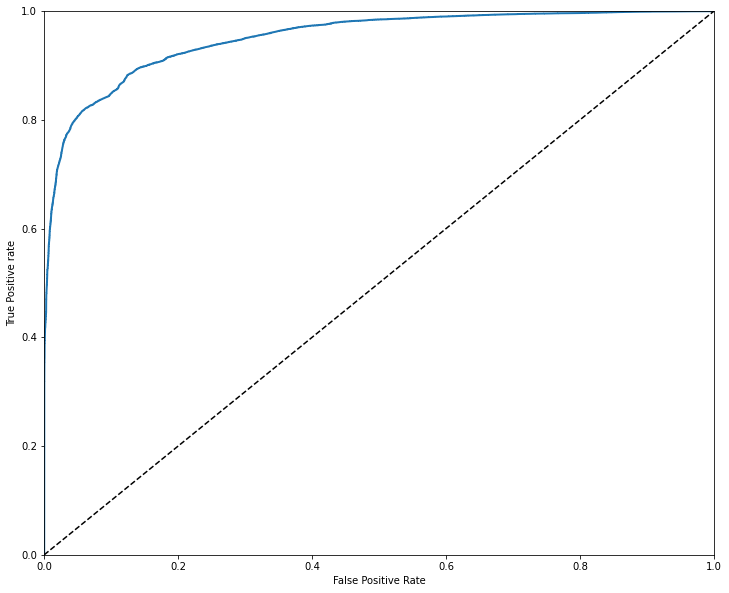

In [48]:
# 交叉验证
y_test_proba = forest.predict_proba(X_test_rus)
y_scores_test = y_test_proba[:, 1]
fpr_test, tpr_test, thresh_test = roc_curve(y_test_rus, y_scores_test)
plot_roc_curve(fpr_test, tpr_test)
print ('AUC Score:', roc_auc_score(y_test_rus, y_scores_test))

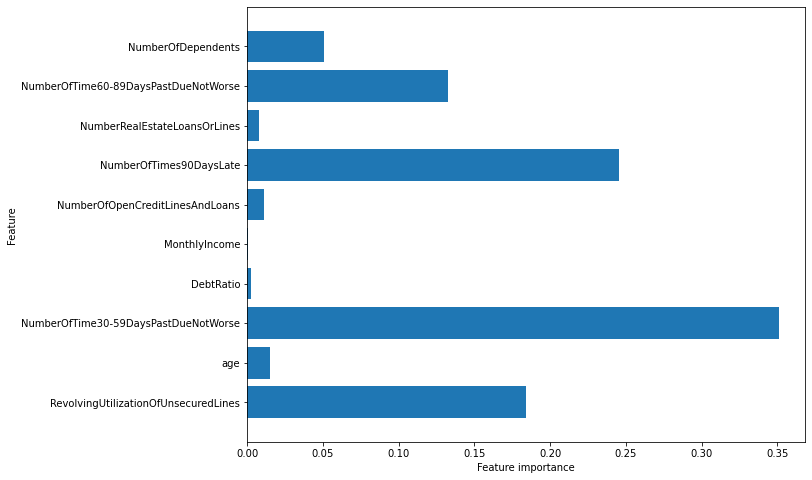

In [49]:
# 看看随机森林法对各个特征的重视程度
def plot_feature_importances(model):
    plt.figure(figsize=(10,8))
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.ylim(-1, n_features)

plot_feature_importances(forest)

### 4.5 梯度提升法分类

AUC Score: 0.9259526393086057


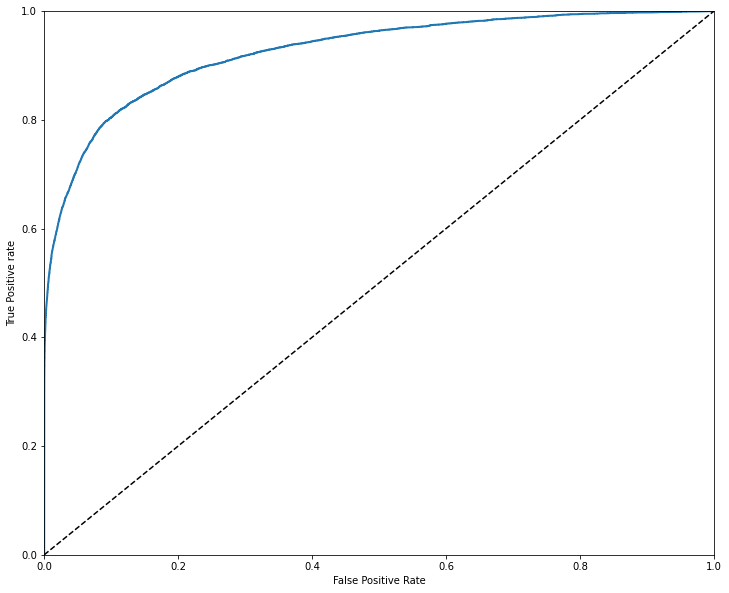

In [50]:
# 看一下梯度提升法
gbc_clf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=8, random_state=112)
gbc_clf.fit(X_train, y_train)
gbc_clf_proba = gbc_clf.predict_proba(X_train)
gbc_clf_scores = gbc_clf_proba[:, 1]
fpr_gbc, tpr_gbc, thresh_gbc = roc_curve(y_train, gbc_clf_scores)
plot_roc_curve(fpr_gbc, tpr_gbc)
print('AUC Score:', roc_auc_score(y_train, gbc_clf_scores))

AUC Score (Cross-Validated): 0.842903559463649


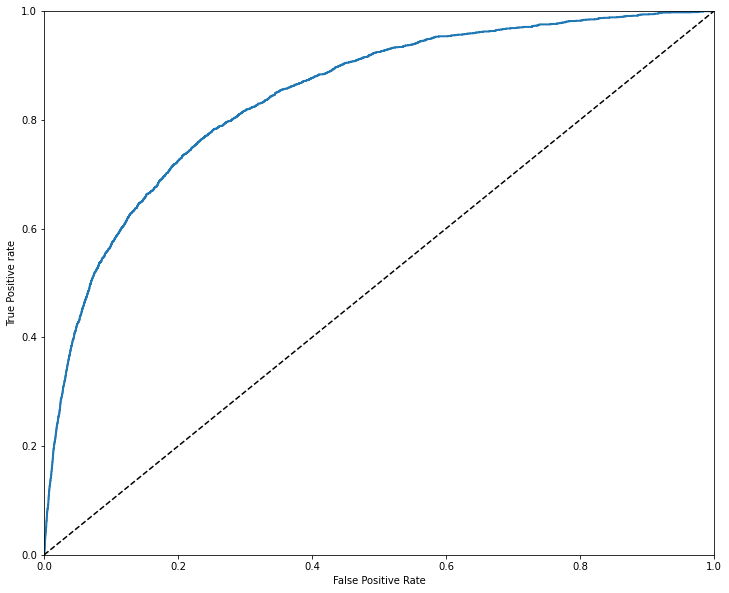

In [51]:
from sklearn.model_selection import cross_val_predict

# 使用 cross_val_predict 获取交叉验证的预测概率
gbc_val_proba_cv = cross_val_predict(gbc_clf, X_test, y_test, cv=5, method='predict_proba')
gbc_val_scores_cv = gbc_val_proba_cv[:, 1]

# 计算 ROC 曲线
fpr_gbc_cv, tpr_gbc_cv, thresh_gbc_cv = roc_curve(y_test, gbc_val_scores_cv)

# 绘制 ROC 曲线
plot_roc_curve(fpr_gbc_cv, tpr_gbc_cv)

# 输出 AUC 分数
print('AUC Score (Cross-Validated):', roc_auc_score(y_test, gbc_val_scores_cv))


In [57]:
# 来看一下交叉验证的结果
gbc_val_proba = gbc_clf.predict_proba(X_test)
gbc_val_scores = gbc_val_proba[:, 1]
print('AUC score:', roc_auc_score(y_test, gbc_val_scores))

AUC score: 0.8573042393501318


模型在训练集表现远远胜于在测试集的表现，考虑存在过拟合的问题，对参数进行调节。

In [61]:
gbc_clf_submission = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05 ,max_depth=4,  random_state=42)
gbc_clf_submission.fit(X_train,y_train)
gbc_clf_proba = gbc_clf_submission.predict_proba(X_train)
gbc_clf_scores = gbc_clf_proba[:,1]
gbc_val_proba = gbc_clf_submission.predict_proba(X_test)
gbc_val_scores = gbc_val_proba[:,1]
fpr_gbc, tpr_gbc, thresh_gbc = roc_curve(y_train, gbc_clf_scores)
print('AUC Score :', roc_auc_score(y_train, gbc_clf_scores))
print('AUC Score :', roc_auc_score(y_test, gbc_val_scores))

AUC Score : 0.8735591870554327
AUC Score : 0.8610156684938467


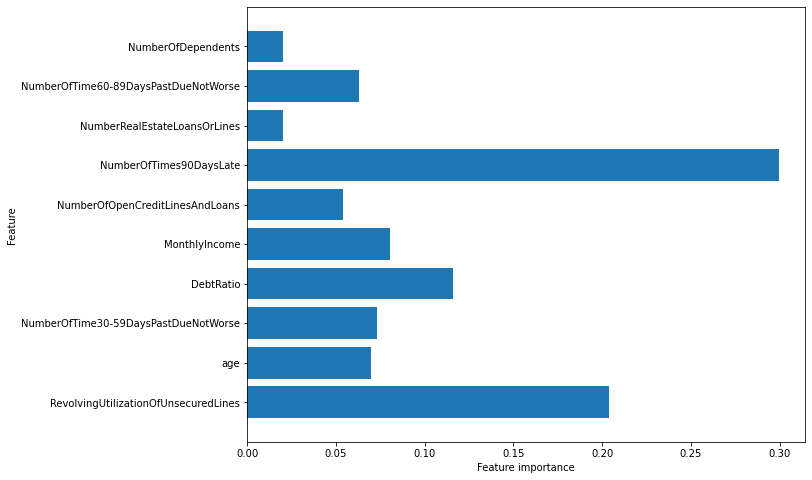

In [36]:
# 看看梯度提升法对各个特征的重视程度
plot_feature_importances(gbc_clf)

和随机森林法相比，GBC方法给予DebtRatio更多着重。
### 4.6 数据输出

In [86]:
# 梯度提升法结果输出
clf_submission_proba = gbc_clf_submission.predict_proba(W)
clf_submission_scores = clf_submission_proba[:, 1]
clf_submission_scores.shape

NameError: name 'gbc_clf_submission' is not defined

In [82]:
ids = np.arange(1, 101504)
submission_clf = pd.DataFrame( {'Id': ids, 'Probability': clf_submission_scores})
submission_clf.to_csv("C:/Users/001/Desktop/GiveMeSomeCredit/submission_clf.csv", index=False)

In [73]:
# 随机森林法结果输出
forest_submission = RandomForestClassifier(n_estimators=300, random_state=111, max_depth=5, class_weight='balanced')
forest_submission.fit(X_train_rus, y_train_rus)
forest_submission_proba = forest_submission.predict_proba(W)
forest_submission_scores = forest_submission_proba[:, 1]
forest_submission_scores.shape

(101503,)

In [76]:
ids = np.arange(1, 101504)
submission_forest = pd.DataFrame( {'Id': ids, 'Probability': forest_submission_scores})
submission_forest.to_csv("C:/Users/001/Desktop/GiveMeSomeCredit/submission_forest.csv", index=False)